# Unveiling Insights with Bellabeat: Exploratory Data Analysis

## Empowering Women's Wellness Through Data Analysis

Welcome to this data analysis project with Bellabeat, a forward-thinking manufacturer of health-focused products designed exclusively for women. In this captivating case study, we embark on a journey to explore and gain profound insights from the world of smart devices. Bellabeat is dedicated to enhancing women's well-being, and our analysis plays a pivotal role in shaping their future marketing strategies.

### Data Source

The dataset used in this analysis, titled "FitBit Fitness Tracker Data: Pattern Recognition with Tracker Data - Improve Your Overall Health," was provided by Möbius on Kaggle. It is licensed under CC0: Public Domain, allowing unrestricted use, modification, and distribution without attribution requirements.

Generated through a distributed survey via Amazon Mechanical Turk, the dataset includes minute-level outputs of physical activity, heart rate, and sleep monitoring over the course of 31 days. It encompasses data from thirty eligible Fitbit users, covering features such as TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, and Calories.

The dataset showcases variations resulting from different Fitbit trackers and individual tracking behaviors/preferences. It can be parsed by export session ID or timestamp. With its extensive coverage of minute-level data, the dataset offers insights into fitness activities and patterns.

By leveraging the dataset's CC0 licensing, we conducted a comprehensive analysis to improve overall health. The dataset provides valuable information for studying fitness and lifestyle patterns.

Please acknowledge Möbius as the dataset provider and reference the original dataset appropriately.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
activity = pd.read_csv("dailyActivity_merged.csv")
calories = pd.read_csv("hourlyCalories_merged.csv")
intensities = pd.read_csv("hourlyIntensities_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")

In [3]:
# intensities
intensities['ActivityHour'] = pd.to_datetime(intensities['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
intensities['time'] = intensities['ActivityHour'].dt.strftime("%H:%M:%S")
intensities['date'] = intensities['ActivityHour'].dt.strftime("%m/%d/%y")

# calories
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
calories['time'] = calories['ActivityHour'].dt.strftime("%H:%M:%S")
calories['date'] = calories['ActivityHour'].dt.strftime("%m/%d/%y")

# activity
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format="%m/%d/%Y")
activity['date'] = activity['ActivityDate'].dt.strftime("%m/%d/%y")

# sleep
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format="%m/%d/%Y %I:%M:%S %p")
sleep['date'] = sleep['SleepDay'].dt.strftime("%m/%d/%y")

In [4]:
unique_ids_activity = activity['Id'].nunique()
unique_ids_calories = calories['Id'].nunique()
unique_ids_intensities = intensities['Id'].nunique()
unique_ids_sleep = sleep['Id'].nunique()
unique_ids_weight = weight['Id'].nunique()

print("Number of unique IDs in activity:", unique_ids_activity)
print("Number of unique IDs in calories:", unique_ids_calories)
print("Number of unique IDs in intensities:", unique_ids_intensities)
print("Number of unique IDs in sleep:", unique_ids_sleep)
print("Number of unique IDs in weight:", unique_ids_weight)

Number of unique IDs in activity: 33
Number of unique IDs in calories: 33
Number of unique IDs in intensities: 33
Number of unique IDs in sleep: 24
Number of unique IDs in weight: 8


33 participants appear in the dataset but only 24 submitted their sleep data or chose to wear the device at night and only 8 submitted their weight data.

In [5]:
# activity
activity_summary = activity[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()

# explore num of active minutes per category
active_minutes_summary = activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].describe()

# calories
calories_summary = calories[['Calories']].describe()

# sleep
sleep_summary = sleep[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe()

# weight
weight_summary = weight[['WeightKg', 'BMI']].describe()

print("Summary Statistics for Activity:")
print(activity_summary)

print("Summary Statistics for Active Minutes:")
print(active_minutes_summary)

print("Summary Statistics for Calories:")
print(calories_summary)

print("Summary Statistics for Sleep:")
print(sleep_summary)

print("Summary Statistics for Weight:")
print(weight_summary)

Summary Statistics for Activity:
         TotalSteps  TotalDistance  SedentaryMinutes     Calories
count    940.000000     940.000000        940.000000   940.000000
mean    7637.910638       5.489702        991.210638  2303.609574
std     5087.150742       3.924606        301.267437   718.166862
min        0.000000       0.000000          0.000000     0.000000
25%     3789.750000       2.620000        729.750000  1828.500000
50%     7405.500000       5.245000       1057.500000  2134.000000
75%    10727.000000       7.712500       1229.500000  2793.250000
max    36019.000000      28.030001       1440.000000  4900.000000
Summary Statistics for Active Minutes:
       VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes
count         940.000000           940.000000            940.000000
mean           21.164894            13.564894            192.812766
std            32.844803            19.987404            109.174700
min             0.000000             0.000000              0.0

Insights: 
- It's noteworthy that the majority of participants in this study are categorized as lightly active.

- On average, participants sleep once a day, totaling around 7 hours of sleep per night. While 7 hours of sleep is a common benchmark, it's important to note that individual sleep needs may vary, and factors such as age, lifestyle, and overall health play a role in determining the ideal amount of sleep.

- The average daily step count is 7,638, which falls slightly below the threshold recommended for health benefits. Research by the CDC has shown that taking 8,000 steps per day was associated with a 51% lower risk of all-cause mortality, emphasizing the importance of physical activity.

- It's worth considering that in many industrialized countries, a significant portion of the population leads a sedentary lifestyle, which can be a concern for public health. Encouraging increased physical activity is essential for combating the negative effects of sedentary behavior, such as obesity and associated health risks.

In [6]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,04/12/16
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,04/13/16
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,04/14/16
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,04/15/16
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,04/16/16


In [23]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

---
### Data Dictionary of activity

| Column Name                | Description                                              |
| -------------------------- | -------------------------------------------------------- |
| Id                         | Unique identifier for each record in the dataframe       |
| ActivityDate               | Date of the activity or measurement                       |
| TotalSteps                 | Total number of steps taken                              |
| TotalDistance              | Total distance covered                                   |
| TrackerDistance            | Distance measured by a tracking device                   |
| LoggedActivitiesDistance   | Distance covered during logged activities                |
| VeryActiveDistance         | Distance covered during very active activities           |
| ModeratelyActiveDistance   | Distance covered during moderately active activities     |
| LightActiveDistance        | Distance covered during light active activities          |
| SedentaryActiveDistance    | Distance covered during sedentary active activities      |
| VeryActiveMinutes          | Total minutes spent in very active activities            |
| FairlyActiveMinutes        | Total minutes spent in fairly active activities          |
| LightlyActiveMinutes       | Total minutes spent in lightly active activities         |
| SedentaryMinutes           | Total minutes spent in a sedentary state                 |
| Calories                   | Total number of calories burned                          |

In [36]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
 3   time          22099 non-null  object        
 4   date          22099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 863.4+ KB


We will plot the user intensity over time and overlay it with the calories over time.

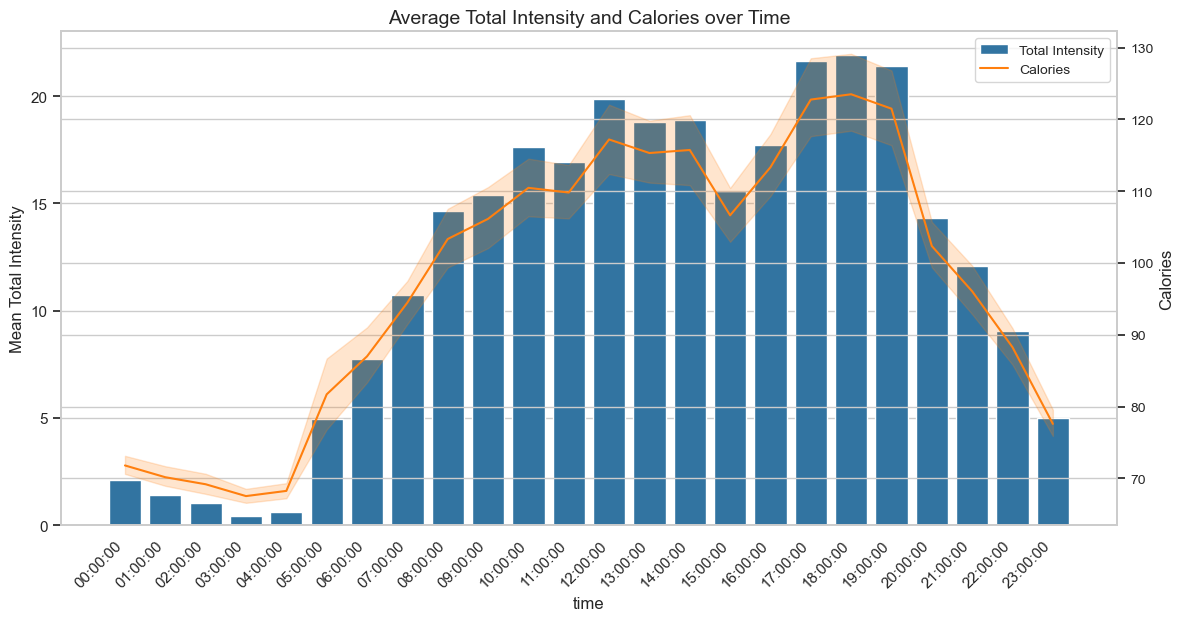

In [50]:
# Define the custom colors
custom_blue = "#1f77b4"  # A shade of blue
custom_orange = "#ff7f0e"  # A shade of orange

# Group by 'time' and calculate the mean of 'TotalIntensity'
int_new = intensities.groupby('time').mean(numeric_only=True).reset_index()

# Merge the 'Calories' DataFrame into 'int_new' based on 'time' and 'Id'
merged_df = pd.merge(int_new, calories[['time', 'Calories']], on='time', how='inner')

# Create the bar plot for 'TotalIntensity' in blue
plt.figure(figsize=(12, 6))  # Increase the figure size
ax1 = sns.barplot(x='time', y='TotalIntensity', data=merged_df, color=custom_blue, label='Total Intensity')

# Set the first y-axis label
ax1.set_ylabel('Mean Total Intensity', fontsize=12)

# Create a secondary y-axis for 'Calories'
ax2 = ax1.twinx()
sns.lineplot(x='time', y='Calories', data=calories, color=custom_orange, label='Calories')

# Set the second y-axis label
ax2.set_ylabel('Calories', fontsize=12)

plt.xlabel('Time', fontsize=12)
plt.title('Average Total Intensity and Calories over Time', fontsize=14)

# Use plt.setp to rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=10)

# Use plt.setp to modify the properties of x-axis tick labels
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.show()

Most activity happens between 5 am and 11 pm, with peaks around 5 pm and 7 pm. This probably indicates, that people got off work and go to the gym or other activities. We can also nicely see how intensities and calories correlate which each other.

**Sending notifications to promote physical activity during this time might be an effective approach to motivate people.**

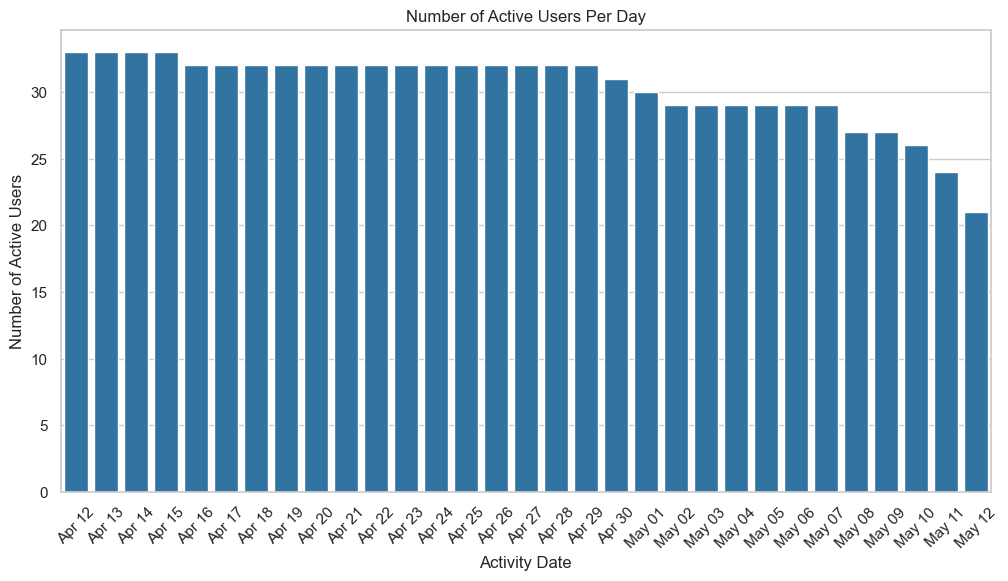

In [51]:
# Group the data by date and count the number of unique users each day
user_activity_by_date = activity.groupby('ActivityDate')['Id'].nunique().reset_index()

# Format the date in the 'ActivityDate' column to remove the year
user_activity_by_date['ActivityDate'] = user_activity_by_date['ActivityDate'].dt.strftime('%b %d')

# Create the second bar plot with the same blue color
plt.figure(figsize=(12, 6))
sns.barplot(data=user_activity_by_date, x='ActivityDate', y='Id', color=custom_blue)
plt.xlabel('Activity Date')
plt.ylabel('Number of Active Users')
plt.title('Number of Active Users Per Day')
plt.xticks(rotation=45)
plt.show()

As can be seen, at the beginning of data collection, all 33 users used the app on a daily basis. However, this usage steadily decreased over time.

**Motivating users to use the devices and app each day using streaks and ranking systems could enhance engagement levels.**

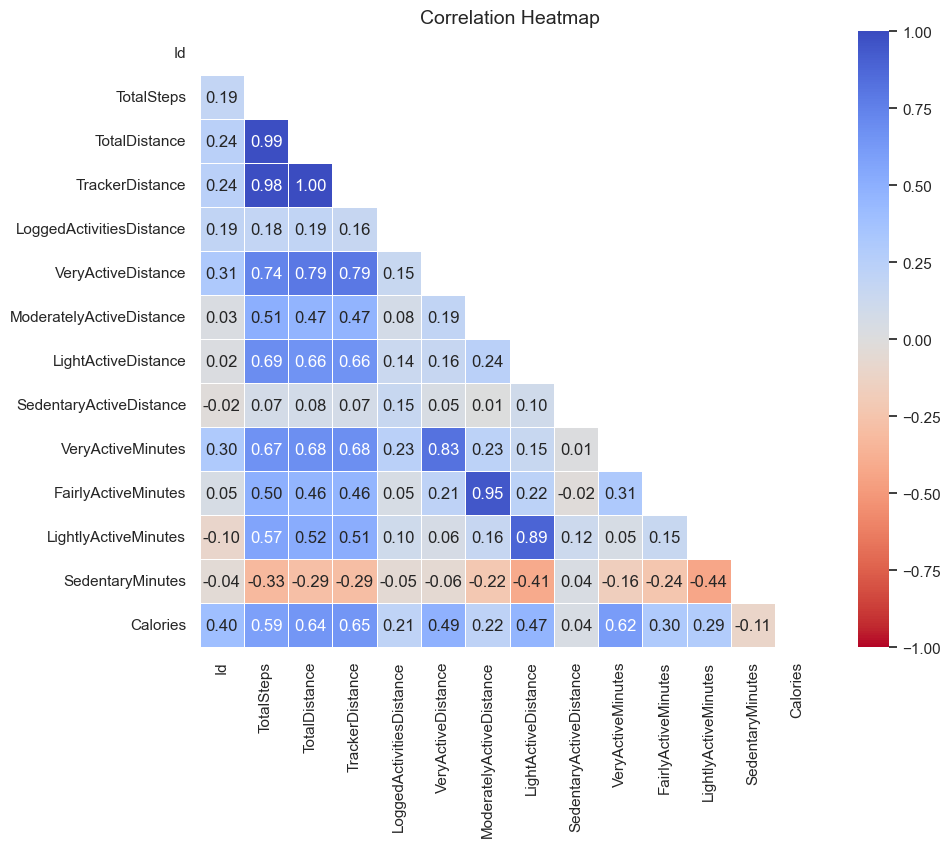

In [52]:
# Calculate the correlation matrix
correlation_matrix = activity.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap with the masked upper triangle
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm_r", vmin=-1, vmax=1, center=0, linewidths=0.5, mask=mask)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Analysis of Correlation Heatmap

 **Similarity in Activity Metrics:**
   - Metrics such as `TotalSteps`, `TotalDistance`, and `TrackerDistance` demonstrate remarkably high correlation coefficients. This suggests that these measures are closely related and might be interchangeable for certain analyses.

 **Sensor Data Consistency:**
   - Strong correlations among various active distance and active minutes categories indicate the reliability and consistency of the sensor data. This implies that the tracking device is effective in accurately capturing different levels of physical activity.

 **Calories Expenditure Patterns:**
   - Notably, there is a strong correlation between `Calories` and metrics related to intensity, particularly the "VeryActive" categories, as well as `TotalSteps`, `TotalDistance`, and `TrackerDistance`. This suggests that the device is proficient in estimating calorie expenditure during more intense physical activities, which can be essential for tracking fitness and health goals.

In summary, the correlation heatmap highlights the interrelatedness of activity metrics, the sensor's accuracy in capturing different activity levels, and the device's effectiveness in estimating calorie expenditure, particularly during intense activities. These insights can inform further analysis and decision-making related to health and fitness tracking.

In [28]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   date                413 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ KB


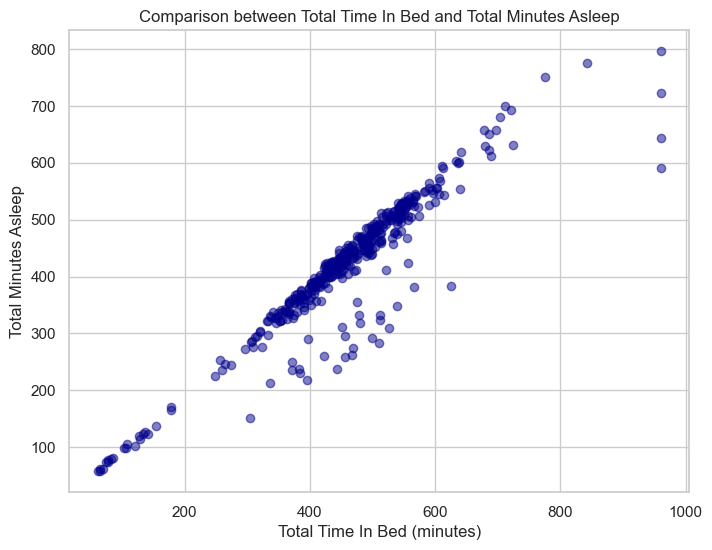

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(sleep['TotalTimeInBed'], sleep['TotalMinutesAsleep'], color='darkblue', alpha=0.5)
plt.xlabel('Total Time In Bed (minutes)')
plt.ylabel('Total Minutes Asleep')
plt.title('Comparison between Total Time In Bed and Total Minutes Asleep')
plt.grid(True)
plt.show()

In our sleep analysis, a clear and direct correlation emerges when examining the time spent in bed and the total minutes asleep. However, it is essential to note the presence of a few outliers. These outliers indicate instances where individuals spend time in bed without actually sleeping.

**To enhance sleep quality, it's advisable to encourage users to designate the bed primarily for sleep-related activities. This means refraining from using the bed for other purposes, such as entertainment or work. This practice can help create a stronger association between the bed and sleep, potentially improving sleep patterns and overall sleep quality.**

Quality sleep often goes hand in hand with setting the right environment and habits, and reserving the bed for its intended purpose is one step towards achieving this goal.